# Part II - Ford GoBike System
## by Jubril Okunade

## Investigation Overview

> For this investigation, I wanted to explore the changes in trip duration with respect to days of the week, user type and gender type.


## Dataset Overview

This dataset includes information about individual bike rides made in a bike sharing system covering the greater San Francisco Bay area.The features in this dataset include duration_sec,start_time,end_time,start_station_name,end_station_name,user_type and member_gender. A significant portion of the original data had been removed during the cleaning process. The cleaned dataset was stored with the name **ford_bk**. I will be using the cleaned dataset **ford_bk** for my presentation below.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df2 =pd.read_csv('ford_bk')

In [3]:
df2.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,February,Friday,March
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,February,Friday,March
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,February,Friday,March
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,Thursday,February,Friday,March
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,Thursday,February,Friday,March


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of rides by User Type

The barchart below shows over 150,000 as the subscriber count and over 15,000 as the customer count. This shows us that the vast majority of the users are from the subscriber base.

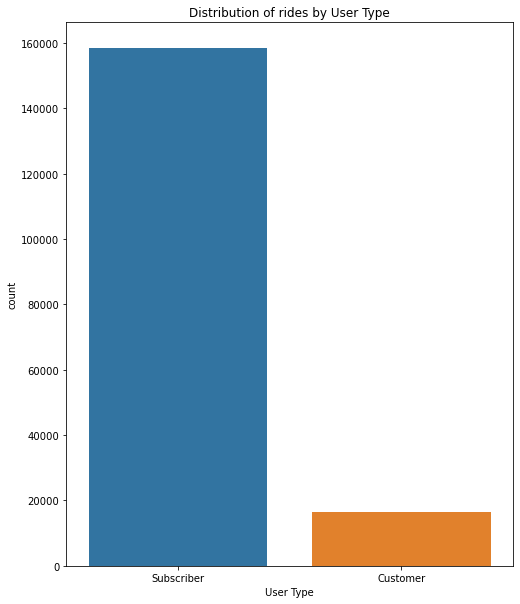

In [4]:
users =df2['user_type'].value_counts().index
plt.figure(figsize=(8,10))
sb.countplot(data=df2,x='user_type',order=users)
plt.title('Distribution of rides by User Type')
plt.xlabel('User Type')
plt.show()

## Distribution of rides by Weekday

From the barchart below I observed that most of the trips were taken on Thursday. I also observed that the weekends (Saturday & Sunday) had the lowest trip count.

In [ ]:
# covert day into ordered categories
ord_cat ={'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']}

for cat in ord_cat:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ord_cat[cat])
    df2[cat] = df2[cat].astype(ordered_var)

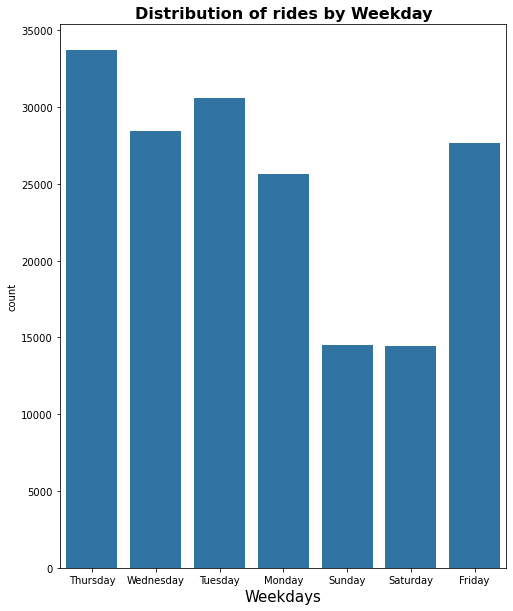

In [5]:
# ride per days
plt.figure(figsize=(8,10))

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'start_day', color = default_color)
plt.title('Distribution of rides by Weekday',fontsize=16,fontweight='bold')
plt.xlabel('Weekdays',fontsize=15)
plt.show()

## Distribution of rides by Gender

From the barchart below I observed that the overwhelming majority of users are males.

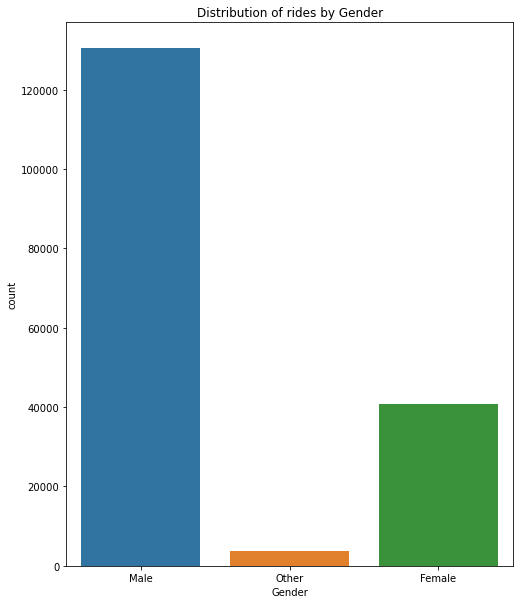

In [6]:
plt.figure(figsize=(8,10))
sb.countplot(data=df2,x='member_gender')
plt.title('Distribution of rides by Gender')
plt.xlabel('Gender')
plt.show()

## Trip Duration across Gender Type

I observed that Female users spent more time during rides.

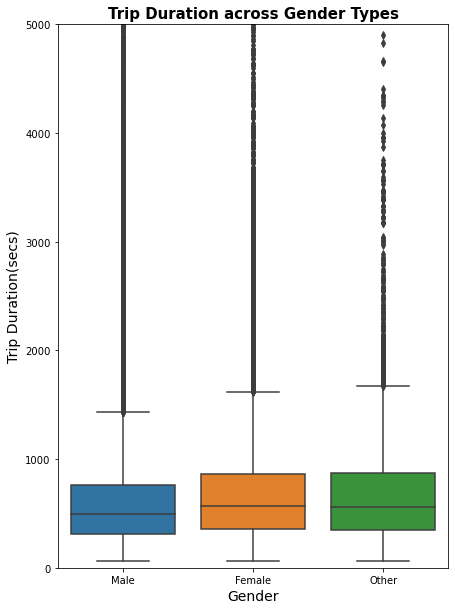

In [7]:
plt.figure(figsize=(7,10))
sb.boxplot(x='member_gender',y='duration_sec',data=df2,order=['Male','Female','Other'])
plt.ylim(0,5000)
plt.title('Trip Duration across Gender Types',fontsize=15,fontweight='bold')
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Trip Duration(secs)',fontsize=14)
plt.show()

## Trip Duration across User Type

I observed that customers spent more time during rides.

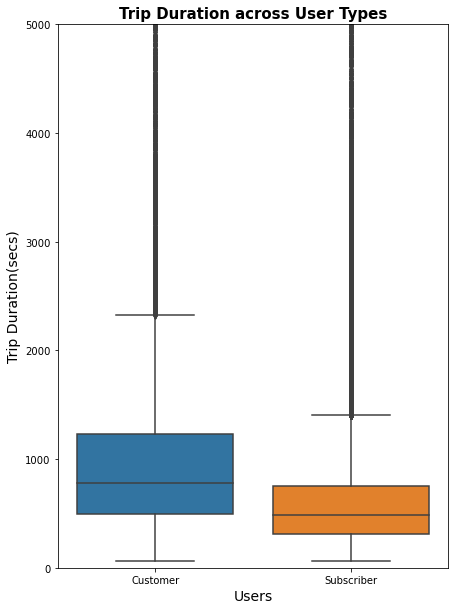

In [8]:
plt.figure(figsize=(7,10))
sb.boxplot(x='user_type',y='duration_sec',data=df2)
plt.ylim(0,5000)
plt.title('Trip Duration across User Types',fontsize=15,fontweight='bold')
plt.xlabel('Users',fontsize=14)
plt.ylabel('Trip Duration(secs)',fontsize=14)
plt.show()

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert "Part_II_Ford GoBike System Data.ipynb" --to slides --post serve --no-input --no-prompt